In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv(r'C:\Users\wlsgh\Downloads\인공지능개론\3주차\car_evaluation.csv', header=None, 
                names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
columns=['buying','maint','doors','persons','lug_boot','safety','class']
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
# 데이터와 타겟 분리
X = df.drop('class', axis=1).values
y = df['class'].values

In [6]:

Y = pd.get_dummies(y).values

In [7]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382, 4), (346, 4))

In [10]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
model.add(Dense(10, input_shape=(6,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))  
model.compile(optimizer=Adam(learning_rate=0.04), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 4)                 84        
                                                                 
Total params: 794 (3.10 KB)
Trainable params: 794 (3.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 [==============================] - 4s 19ms/step - loss: 0.3477 - accuracy: 0.6887 - val_loss: 0.2905 - val_accuracy: 0.7266
Epoch 2/30
39/39 [==============================] - 0s 7ms/step - loss: 0.2816 - accuracy: 0.7104 - val_loss: 0.2478 - val_accuracy: 0.7482
Epoch 3/30
39/39 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.7707 - val_loss: 0.2467 - val_accuracy: 0.8129
Epoch 4/30
39/39 [==============================] - 0s 7ms/step - loss: 0.2187 - accuracy: 0.7997 - val_loss: 0.1858 - val_accuracy: 0.8201
Epoch 5/30
39/39 [==============================] - 0s 10ms/step - loss: 0.1987 - accuracy: 0.8158 - val_loss: 0.1774 - val_accuracy: 0.8417
Epoch 6/30
39/39 [==============================] - 0s 7ms/step - loss: 0.1840 - accuracy: 0.8182 - val_loss: 0.1642 - val_accuracy: 0.8489
Epoch 7/30
39/39 [==============================] - 0s 7ms/step - loss: 0.1727 - accuracy: 0.8206 - val_loss: 0.1617 - val_accuracy: 0.8633
Epoch 8/30
39/39 [

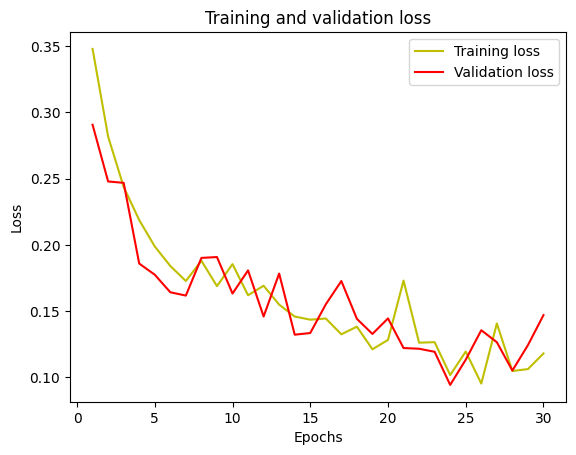

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

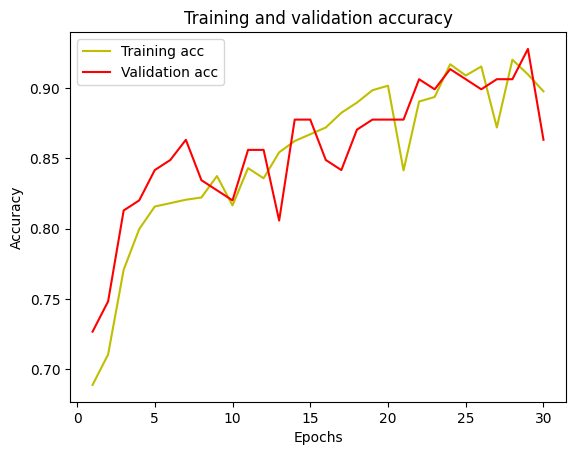

In [13]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74        79
           1       0.50      0.53      0.51        17
           2       0.98      0.92      0.95       240
           3       0.37      0.70      0.48        10

    accuracy                           0.86       346
   macro avg       0.64      0.73      0.67       346
weighted avg       0.88      0.86      0.86       346

[[ 60   9   5   5]
 [  1   9   0   7]
 [ 20   0 220   0]
 [  3   0   0   7]]
